# Rechts

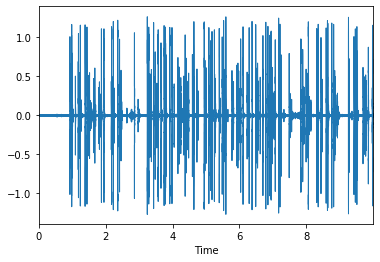

In [13]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
filename = './data_samples/training/rechts/l1.wav'
y, sr = librosa.load(filename)
# trim silent edges
whale_song, _ = librosa.effects.trim(y)
librosa.display.waveplot(whale_song, sr=sr);

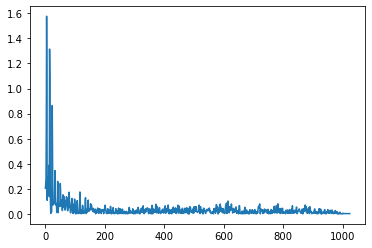

In [14]:
import numpy as np
n_fft = 2048
D = np.abs(librosa.stft(whale_song[:n_fft], n_fft=n_fft,
                        hop_length=n_fft+1))
plt.plot(D);

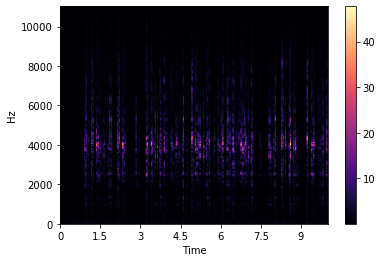

In [15]:
import matplotlib.pyplot as plt
hop_length = 512
D = np.abs(librosa.stft(whale_song, n_fft=n_fft,  
                        hop_length=hop_length))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='linear');
plt.colorbar();

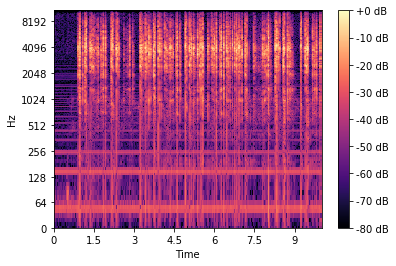

In [16]:
DB = librosa.amplitude_to_db(D, ref=np.max)
librosa.display.specshow(DB, sr=sr, hop_length=hop_length, 
                         x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');

In [17]:
n_mels = 128
mel = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels)

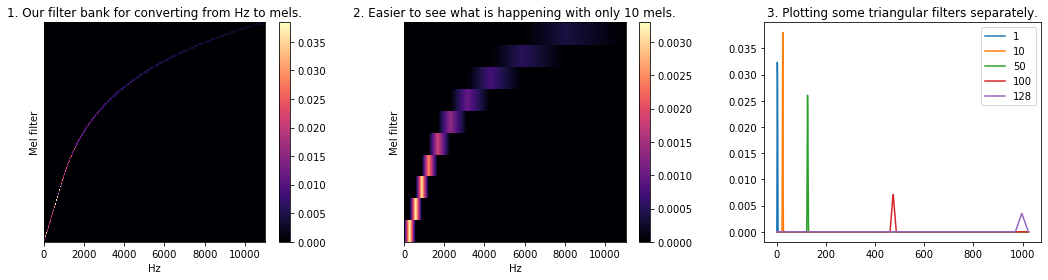

In [18]:
plt.figure(figsize=(15, 4));
plt.subplot(1, 3, 1);
librosa.display.specshow(mel, sr=sr, hop_length=hop_length, 
                         x_axis='linear');
plt.ylabel('Mel filter');
plt.colorbar();
plt.title('1. Our filter bank for converting from Hz to mels.');
plt.subplot(1, 3, 2);
mel_10 = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=10)
librosa.display.specshow(mel_10, sr=sr, hop_length=hop_length, 
                         x_axis='linear');
plt.ylabel('Mel filter');
plt.colorbar();
plt.title('2. Easier to see what is happening with only 10 mels.');
plt.subplot(1, 3, 3);
idxs_to_plot = [0, 9, 49, 99, 127]
for i in idxs_to_plot:
    plt.plot(mel[i]);
plt.legend(labels=['{}'.format(i+1) for i in idxs_to_plot]);
plt.title('3. Plotting some triangular filters separately.');
plt.tight_layout();

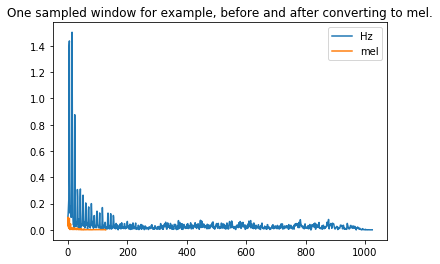

In [19]:
plt.plot(D[:, 1]);
plt.plot(mel.dot(D[:, 1]));
plt.legend(labels=['Hz', 'mel']);
plt.title('One sampled window for example, before and after converting to mel.');

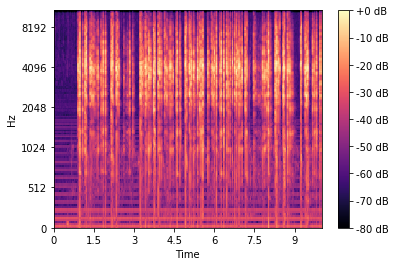

In [20]:
S = librosa.feature.melspectrogram(whale_song, sr=sr, n_fft=n_fft, 
                                   hop_length=hop_length, 
                                   n_mels=n_mels)
S_DB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, 
                         x_axis='time', y_axis='mel');
plt.colorbar(format='%+2.0f dB');

In [21]:
# Sanity check that indeed we understood the underlying pipeline
S = librosa.feature.melspectrogram(whale_song, sr=sr, n_fft=n_fft, 
                                   hop_length=hop_length, 
                                   n_mels=n_mels)
fft_windows = librosa.stft(whale_song, n_fft=n_fft, 
                           hop_length=hop_length)
magnitude = np.abs(fft_windows)**2
mel = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels)
assert (mel.dot(magnitude) == S).all()

# Testdaten

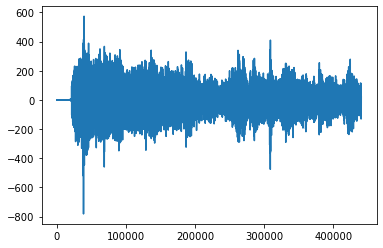

In [22]:
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
rate, data = wav.read('./data_samples/testing/test/test.wav')
%matplotlib inline
plt.plot(data)
plt.show()